## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [9]:
import os
import keras
from keras.regularizers import l1, l2, l1_l2

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## L1

In [22]:
def build_mlp(x_train,output_unit = 10,num_neurons=[512,256,128],l2_ratio = 1e-4):
    input_layer = keras.layers.Input(x_train.shape[1:])
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = "hidden_layer" + str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = "hidden_layer" + str(i+1),
                                   kernel_regularizer=l1(l2_ratio))(x)
            
    out = keras.layers.Dense(units = output_unit,activation="softmax",name = 'output')(x)
    model = keras.models.Model(input = [input_layer],output = [out])
    return model

In [23]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [24]:
results = {}
for i in L2_EXP:
    keras.backend.clear_session()
    model = build_mlp(x_train = x_train,l2_ratio=i)
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
    model.compile(loss = "categorical_crossentropy",optimizer = optimizer ,metrics = ['accuracy'])
    model.fit(x_train,y_train,
              epochs = EPOCHS,
              validation_data = (x_test,y_test),
              shuffle = True)
    
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    name = 'L2_EXP %s' %(i)
    
    results[name] = {
        'train_loss' : train_loss,
        'val_loss' : val_loss,
        'train_acc' : train_acc,
        'val_acc' : val_acc        
    }

C:\Users\nien\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 299us/step - loss: 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.6653 - acc: 0.3513 - val_loss: 2.5230 - val_acc: 0.3942
Epoch 2/50
50000/50000 [==============================] - 14s 276us/step - loss: 2.4151 - acc: 0.4270 - val_loss: 2.3304 - val_acc: 0.4504
Epoch 3/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.2875 - acc: 0.4545 - val_loss: 2.2267 - val_acc: 0.4636
Epoch 4/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.1867 - acc: 0.4765 - val_loss: 2.1638 - val_acc: 0.4729
Epoch 5/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.1005 - acc: 0.4916 - val_loss: 2.0938 - val_acc: 0.4905
Epoch 6/50
50000/50000 [==============================] - 14s 285us/step - loss: 2.0240 - acc: 0.5063 - val_loss: 2.0310 - val_acc: 0.4973
Epoch 7/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9547 - acc: 0.5173 - val_loss: 2.

Epoch 2/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.6079 - acc: 0.4270 - val_loss: 1.5377 - val_acc: 0.4556
Epoch 3/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.5257 - acc: 0.4584 - val_loss: 1.5089 - val_acc: 0.4621
Epoch 4/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.4703 - acc: 0.4765 - val_loss: 1.5035 - val_acc: 0.4621
Epoch 5/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.4233 - acc: 0.4945 - val_loss: 1.4373 - val_acc: 0.4920
Epoch 6/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.3844 - acc: 0.5066 - val_loss: 1.4116 - val_acc: 0.4978
Epoch 7/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.3484 - acc: 0.5193 - val_loss: 1.4230 - val_acc: 0.4976
Epoch 8/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.3132 - acc: 0.5328 - val_loss: 1.4121 - val_acc: 0.4938
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 14s 279us/step - loss: 1.5284 - acc: 0.4547 - val_loss: 1.5492 - val_acc: 0.4552
Epoch 4/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.4706 - acc: 0.4788 - val_loss: 1.4527 - val_acc: 0.4822
Epoch 5/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.4236 - acc: 0.4919 - val_loss: 1.4865 - val_acc: 0.4738
Epoch 6/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.3854 - acc: 0.5064 - val_loss: 1.4353 - val_acc: 0.4935
Epoch 7/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.3546 - acc: 0.5154 - val_loss: 1.4507 - val_acc: 0.4859
Epoch 8/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.3201 - acc: 0.5295 - val_loss: 1.3670 - val_acc: 0.5101
Epoch 9/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.2831 - acc: 0.5431 - val_loss: 1.3911 - val_acc: 0.5081
Epoch 10/50
50000/50000 [=============

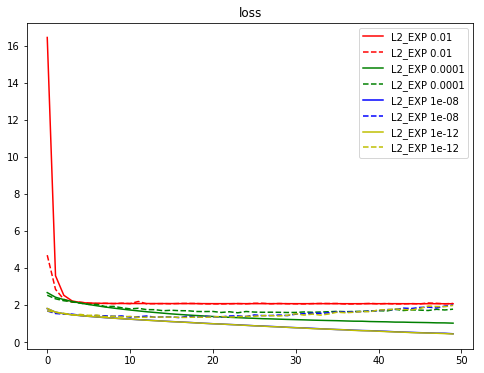

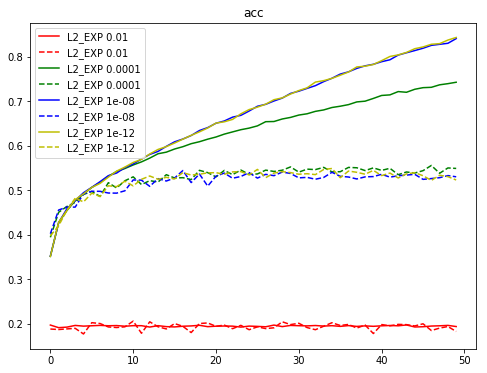

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',color = color_bar[i],label = cond)
    plt.plot(range(len(results[cond]['val_loss'])),results[cond]['val_loss'],'--',color = color_bar[i],label = cond)
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',color = color_bar[i],label = cond)
    plt.plot(range(len(results[cond]['val_acc'])),results[cond]['val_acc'],'--',color = color_bar[i],label = cond)
plt.title('acc')
plt.legend()
plt.show()

## L1-L2

In [26]:
def build_mlp(x_train,output_unit = 10,num_neurons=[512,256,128],l2_ratio = 1e-4):
    input_layer = keras.layers.Input(x_train.shape[1:])
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = "hidden_layer" + str(i+1),
                                   kernel_regularizer=l1_l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,
                                   activation='relu',
                                   name = "hidden_layer" + str(i+1),
                                   kernel_regularizer=l1(l2_ratio))(x)
            
    out = keras.layers.Dense(units = output_unit,activation="softmax",name = 'output')(x)
    model = keras.models.Model(input = [input_layer],output = [out])
    return model

In [27]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [28]:
results = {}
for i in L2_EXP:
    keras.backend.clear_session()
    model = build_mlp(x_train = x_train,l2_ratio=i)
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE,nesterov=True,momentum=MOMENTUM)
    model.compile(loss = "categorical_crossentropy",optimizer = optimizer ,metrics = ['accuracy'])
    model.fit(x_train,y_train,
              epochs = EPOCHS,
              validation_data = (x_test,y_test),
              shuffle = True)
    
    train_loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    val_acc = model.history.history['val_acc']
    
    name = 'L2_EXP %s' %(i)
    
    results[name] = {
        'train_loss' : train_loss,
        'val_loss' : val_loss,
        'train_acc' : train_acc,
        'val_acc' : val_acc        
    }

C:\Users\nien\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 326us/step - loss: 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 295us/step - loss: 9.3910 - acc: 0.3447 - val_loss: 5.7149 - val_acc: 0.3827
Epoch 2/50
50000/50000 [==============================] - 15s 296us/step - loss: 4.1657 - acc: 0.4050 - val_loss: 3.1274 - val_acc: 0.4229
Epoch 3/50
50000/50000 [==============================] - 16s 311us/step - loss: 2.7700 - acc: 0.4114 - val_loss: 2.4924 - val_acc: 0.4297
Epoch 4/50
50000/50000 [==============================] - 16s 324us/step - loss: 2.4463 - acc: 0.4172 - val_loss: 2.4470 - val_acc: 0.4074
Epoch 5/50
50000/50000 [==============================] - 16s 326us/step - loss: 2.3581 - acc: 0.4238 - val_loss: 2.3100 - val_acc: 0.4321
Epoch 6/50
50000/50000 [==============================] - 20s 391us/step - loss: 2.2947 - acc: 0.4277 - val_loss: 2.2366 - val_acc: 0.4417
Epoch 7/50
50000/50000 [==============================] - 16s 329us/step - loss: 2.2426 - acc: 0.4308 - val_loss: 2.

Epoch 2/50
50000/50000 [==============================] - 15s 308us/step - loss: 3.1740 - acc: 0.4078 - val_loss: 2.4044 - val_acc: 0.4322
Epoch 3/50
50000/50000 [==============================] - 15s 307us/step - loss: 2.1143 - acc: 0.4234 - val_loss: 1.8830 - val_acc: 0.4382
Epoch 4/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.8097 - acc: 0.4302 - val_loss: 1.7915 - val_acc: 0.4130
Epoch 5/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.7087 - acc: 0.4371 - val_loss: 1.6832 - val_acc: 0.4395
Epoch 6/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.6676 - acc: 0.4441 - val_loss: 1.6994 - val_acc: 0.4285
Epoch 7/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.6499 - acc: 0.4488 - val_loss: 1.7235 - val_acc: 0.4137
Epoch 8/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.6384 - acc: 0.4547 - val_loss: 1.6419 - val_acc: 0.4487
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 15s 303us/step - loss: 2.1091 - acc: 0.4272 - val_loss: 1.8945 - val_acc: 0.4357
Epoch 4/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.8003 - acc: 0.4365 - val_loss: 1.7166 - val_acc: 0.4491
Epoch 5/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.7068 - acc: 0.4416 - val_loss: 1.7205 - val_acc: 0.4233
Epoch 6/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.6655 - acc: 0.4465 - val_loss: 1.6760 - val_acc: 0.4378
Epoch 7/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.6428 - acc: 0.4524 - val_loss: 1.7062 - val_acc: 0.4309
Epoch 8/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.6327 - acc: 0.4534 - val_loss: 1.6469 - val_acc: 0.4505
Epoch 9/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.6299 - acc: 0.4587 - val_loss: 1.6175 - val_acc: 0.4660
Epoch 10/50
50000/50000 [=============

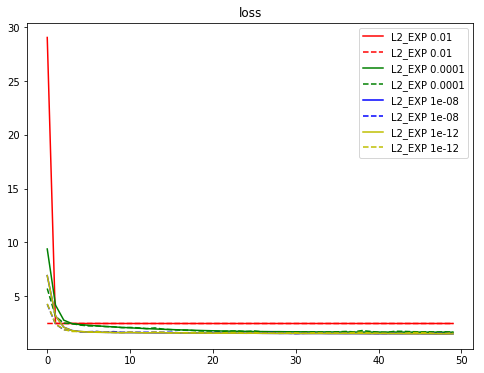

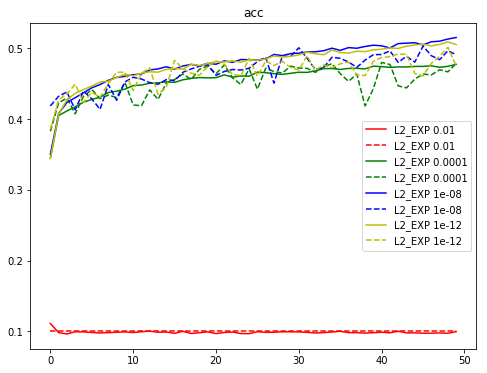

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',color = color_bar[i],label = cond)
    plt.plot(range(len(results[cond]['val_loss'])),results[cond]['val_loss'],'--',color = color_bar[i],label = cond)
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',color = color_bar[i],label = cond)
    plt.plot(range(len(results[cond]['val_acc'])),results[cond]['val_acc'],'--',color = color_bar[i],label = cond)
plt.title('acc')
plt.legend()
plt.show()